# Filtering images
Image filters take an image and produce a new image. Typically, a filter kernel goes from pixel to pixel and computes a new pixel value depending on an old pixel and its neighborhood.

See also
* [Filters in scikit-image](https://scikit-image.org/docs/dev/api/skimage.filters.html)

We start with a test image and apply a Gaussian blur filter.

In [1]:
import numpy as np
from pyclesperanto_prototype import imshow
from skimage.filters import gaussian
from skimage import filters
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage.io import imread

In [2]:
test_image = np.zeros((10,10))
test_image[5,3] = 1
test_image[5,7] = 1
test_image

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

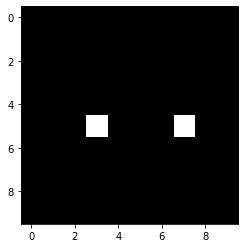

In [3]:
imshow(test_image)

The [Gaussian filter](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian) takes two important arguments, the image to blur and a sigma parameter. The sigma determines how wide the Gaussian blur should show effects.

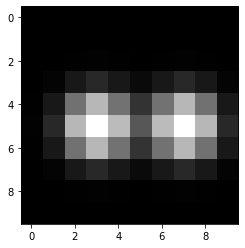

In [4]:
blurred = gaussian(test_image, sigma=1)
imshow(blurred)

Let's compare Gaussian blurred images with different sigma

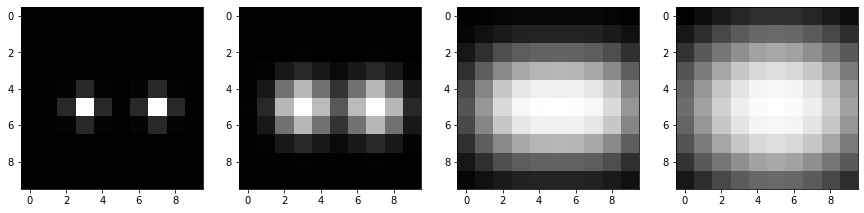

In [5]:
blurred05 = gaussian(test_image, sigma=0.5)
blurred1 = gaussian(test_image, sigma=1)
blurred2 = gaussian(test_image, sigma=2)
blurred3 = gaussian(test_image, sigma=3)

fig, axs = plt.subplots(1, 4, figsize=(15,15))

imshow(blurred05, plot=axs[0])
imshow(blurred1, plot=axs[1])
imshow(blurred2, plot=axs[2])
imshow(blurred3, plot=axs[3])

Note: If the sigma is larger than the distance between two spots, the spots cannot be differentiated as two local maxima in the blurred image anymore. 

## Filters with structuring elements
Some filters ask for a structuring element as [parameter](https://scikit-image.org/docs/dev/auto_examples/numpy_operations/plot_structuring_elements.html#sphx-glr-auto-examples-numpy-operations-plot-structuring-elements-py).
In biological/microscopy applications, the [disk](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) sturcturing element is most commonly used.
To understand it, we should visualize it first. A disk with radius 4 is a 9x9 large image containing black pixels(intensity=0) and disk-shaped pixels with value 1.

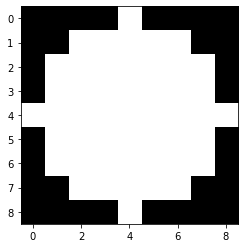

In [6]:


imshow(disk(4))

Disks with other radii look like this:

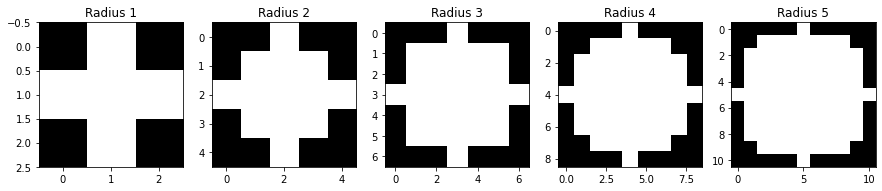

In [7]:
max_radius = 5

fig, axs = plt.subplots(1, max_radius, figsize=(15,15))

for r in range(1, max_radius + 1):
    imshow(disk(r), plot=axs[r - 1])
    axs[r - 1].set_title("Radius " + str(r))

Coming back to our test image, this is how it looks like when we apply a mean filter with different disk radii.

C:\Users\rober\AppData\Local\Temp\ipykernel_8564\198849488.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  filtered1 = filters.rank.mean(test_image, disk(1))
C:\Users\rober\AppData\Local\Temp\ipykernel_8564\198849488.py:2: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  filtered2 = filters.rank.mean(test_image, disk(2))
C:\Users\rober\AppData\Local\Temp\ipykernel_8564\198849488.py:3: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  filtered3 = filters.rank.mean(test_image, disk(3))


Text(0.5, 1.0, 'Mean (radius = 3)')

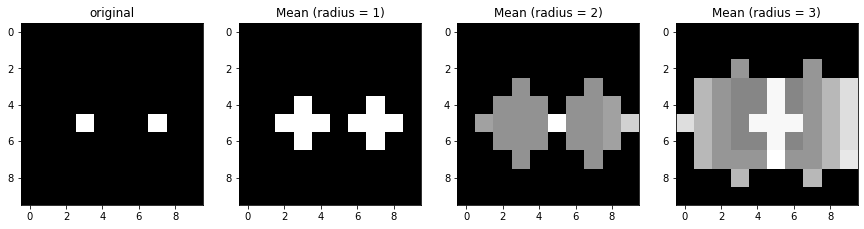

In [8]:
filtered1 = filters.rank.mean(test_image, disk(1))
filtered2 = filters.rank.mean(test_image, disk(2))
filtered3 = filters.rank.mean(test_image, disk(3))

fig, axs = plt.subplots(1, 4, figsize=(15,15))

imshow(test_image, plot=axs[0])
axs[0].set_title('original')

imshow(filtered1, plot=axs[1])
axs[1].set_title('Mean (radius = 1)')

imshow(filtered2, plot=axs[2])
axs[2].set_title('Mean (radius = 2)')

imshow(filtered3, plot=axs[3])
axs[3].set_title('Mean (radius = 3)')